In [1]:
import numpy as np
from wNMF import wNMF

In [2]:
## An example on simulated data
n=100
features = 100
components=25
X = 100*np.random.uniform(size=n*features).reshape(features,n)
W = np.ones_like(X)

In [4]:
model = wNMF(n_components=components,beta_loss='frobenius',max_iter=1000,track_error=True,verbose=1)
fit = model.fit(X=X,W=W,n_run=5)

Beginning Run 1...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 2...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 3...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 4...
|--- Initializing U,V
|--- Running wNMF
|--- Completed
Beginning Run 5...
|--- Initializing U,V
|--- Running wNMF
|--- Completed


In [ ]:
wm = np.load('../data/Small_Weight_Matrix.npy')
dm = np.load('../data/Small_Data_Matrix.npy')
model = wNMF(n_components=components,beta_loss='kullback-leibler',max_iter=1000)
fit = model.fit(X=dm,W=wm,n_run=1)

In [ ]:
print(fit.V)

In [ ]:
print(fit.U)

In [6]:
print(fit.err)

1909518.1524592456


In [7]:
## testing out altair for faceting / data vis
import pandas as pd
errdf = pd.DataFrame(np.log10(fit.error_tracker)).T.rename({i:'run_'+str(i) for i in range(0,components)},axis='columns')

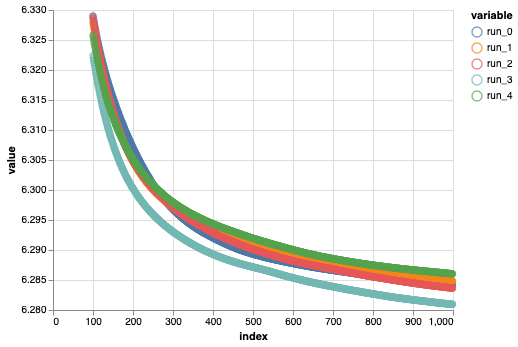

In [8]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(errdf.loc[100:,:].reset_index().melt(id_vars='index')).mark_point().encode(
    alt.X('index:Q'),
    alt.Y('value:Q',scale=alt.Scale(zero=False)),
    color='variable'  
)